In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import nltk
import string


In [14]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [3]:
msg=pd.read_csv('/content/SMSSpamCollection (1)', sep='\t', names=['label','msg'])

In [4]:
msg.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
msg.describe()


,label,msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
msg.groupby('label').describe()

msg                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [7]:
msg['length']=msg['msg'].apply(len)

In [8]:
msg.head()

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


##Data Visualization

<Axes: ylabel='Frequency'>

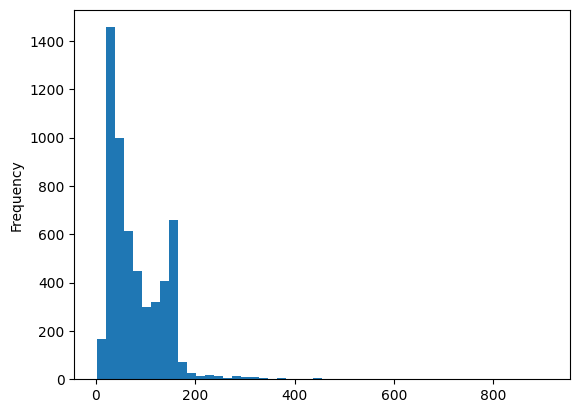

In [9]:
msg['length'].plot(bins=50, kind='hist')

In [10]:
msg.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

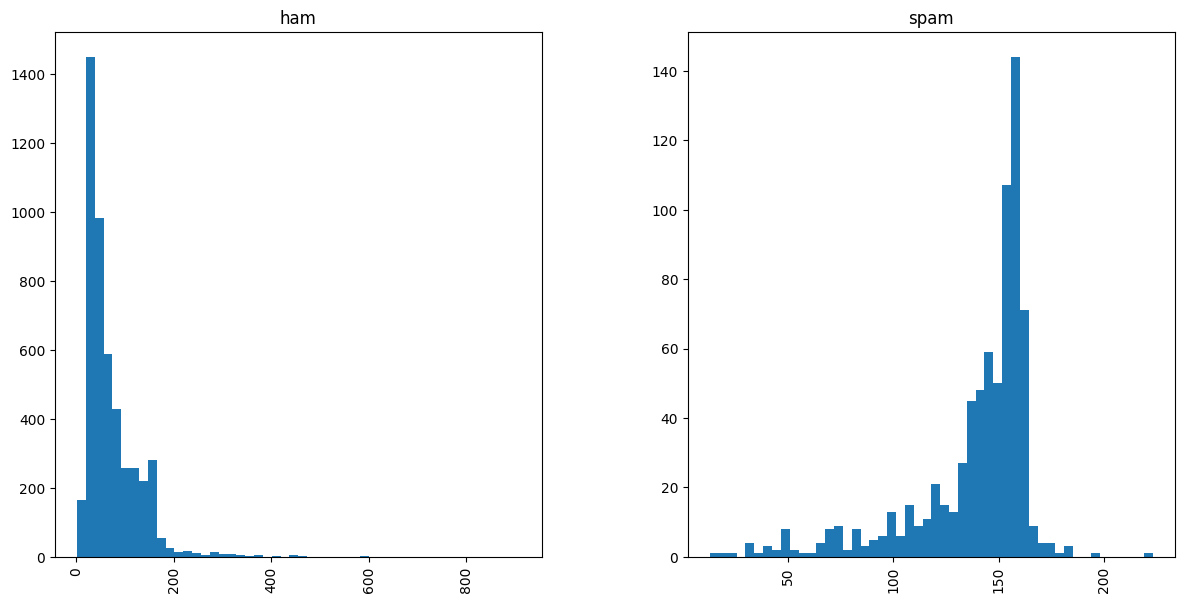

In [11]:
msg.hist(column='length', by='label', bins= 50, figsize=(14,7))

##Text Preprocessing

In [15]:
from nltk.corpus import stopwords

In [24]:
mess='Hi! Vikas is using Machine Learning. #studies'
nopunctuation= [char for char in mess if char not in string.punctuation]
nopunctuation =''.join(nopunctuation)


In [25]:
nopunctuation

'Hi Vikas is using Machine Learning studies'

In [ ]:
stopwords.words('english')

In [27]:
nopunctuation.split()

['Hi', 'Vikas', 'is', 'using', 'Machine', 'Learning', 'studies']

In [35]:
[word for word in nopunctuation.split() if word.lower() not in stopwords.words('english')]

['Hi', 'Vikas', 'using', 'Machine', 'Learning', 'studies']

In [39]:
def text_process(mess):
    '''Take the string from messages
            1. Remove all punctuation
            2. Remove the stopwords
            3. Return a list of cleaned text'''
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
text_process('hi hello!@#$%^&*( )Hiew are you #uygcwiubcwkjbj   as was ')

['hi', 'hello', 'Hiew', 'uygcwiubcwkjbj']

In [41]:
msg.head()

,label,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
msg['msg'].head().apply(text_process)#to check our fn is working or not

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: msg, dtype: object

##Vectorization

In [44]:
from sklearn.feature_extraction.text import CountVectorizer


In [45]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(msg['msg'])

In [46]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7b1f90201750>)

In [47]:
len(bow_transformer.vocabulary_)

11425

In [50]:
msg4=msg['msg'][3]# grabbing the 4th msg
msg4

'U dun say so early hor... U c already then say...'

In [51]:
print(bow_transformer.transform([msg4]))

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [53]:
print(bow_transformer.get_feature_names_out()[7186])

hor


In [55]:
msg_bow_transfom = bow_transformer.transform(msg['msg'])

In [57]:
msg_bow_transfom.shape

(5572, 11425)

In [58]:
msg_bow_transfom.nnz#non zero occurances

50548

##TFIDF And Pipeline

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer

In [60]:
tfidf=TfidfTransformer().fit(msg_bow_transfom)

In [62]:
tfidf

TfidfTransformer()

In [63]:
bow4=bow_transformer.transform([msg4])
bow4

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [64]:
tfidf4=tfidf.transform(bow4)
tfidf4

<1x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [67]:
msg_tfidf=tfidf.transform(msg_bow_transfom)
msg_tfidf


<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

##Training The Model

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
spam_detect= MultinomialNB().fit(msg_tfidf,msg['label'])

In [71]:
print("Predicted:",spam_detect.predict(tfidf4))
print("Expected:",msg.label[4])

Predicted: ['ham']
Expected: ham


In [72]:
from sklearn.model_selection import train_test_split as tts

In [73]:
msg_train,msg_test,lbl_train,lbl_test=tts(msg['msg'],msg['label'],test_size=0.25, random_state=555)

###Creating Pipeline

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [76]:
pipeline.fit(msg_train,lbl_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7b1f90201750>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [77]:
pred=pipeline.predict(msg_test)

In [80]:
print(classification_report(pred,lbl_test))
print(confusion_matrix(pred,lbl_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1253
        spam       0.75      1.00      0.86       140

    accuracy                           0.97      1393
   macro avg       0.88      0.98      0.92      1393
weighted avg       0.98      0.97      0.97      1393

[[1207   46]
 [   0  140]]
